# Information Regarding K - Nearest Neighbors
## Pros :
1: No assumptions about the data <br />
2: Simple algorithm - easy to understand <br />
3: Can be used for classification and regression <br />

## Cons : 
1: High memory requirements - All training data must be present in memory to calculate the closest K Neighbors <br />
2: Sensitive to irrelevant features <br />
3: Sensitive to the scale of the data since your calculating distance to closest K-points

# Algorithm
1: Pick a value for K (i.e. 5) <br />
2: Calcuate the 5 (k) nearest neightbors to that point using Euclidean distance (sqrt(y2 - y2)^2 + (x2 - x1)^2) <br />
3: Count the number of data points in each category of the 5 nearest neightbors <br />
4: Assign the new data point to the category where the most neighbors are counted

# Code
## Import packages and breast cancer data set

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## Dataset information
1. The data set contains two categories (target) malignant and benign tumors. <br />
2. ~30 features <br />
3. For our sake we will take a couple of random features rather than selecting the most important (area, compactness of tumor)



In [2]:
# Load breast cancer data set
breast_cancer = load_breast_cancer()

# Set all feature names to X and index only mean area and mean compactness features
X = pd.DataFrame(breast_cancer.data,
                 columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]

# Set target variables to y. Does one-hot encoding on y
y = pd.Categorical.from_codes(breast_cancer.target, 
                              breast_cancer.target_names)
y = pd.get_dummies(y, drop_first = True)

## Model Building

In [4]:
# Split data into training and test. train_test_split by default sets aside 25% of samples in the original set for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a KNN-Classifier instance. The default value of K in KNeighborsClassifer instance is 5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #Uses euclidean distance

# Build the knn model using training data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Model Assessment

<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

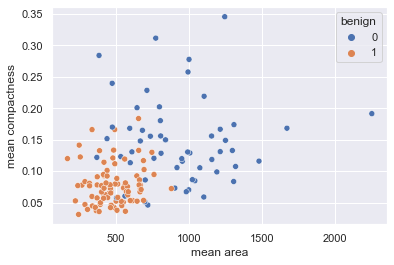

In [11]:
# Build predictions for test set
y_pred = knn.predict(X_test)

# Plot acutal data points
sns.scatterplot(
    x = 'mean area',
    y = 'mean compactness',
    hue = 'benign', # sets the color of data points depending on benign (True = 1, False = 0)
    data = X_test.join(y_test, how='outer') #appending the actual target values for the test set
)

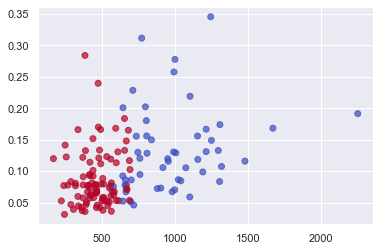

In [12]:
# Plot predicted values for benign tumors
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c = y_pred,
    cmap = 'coolwarm',
    alpha = .7
    )

In [13]:
# Calculate the accuracy of the model
confusion_matrix(y_test, y_pred)

# 42 + 79 / (42 + 79 + 9 + 13) = 84.6%

array([[42, 13],
       [ 9, 79]], dtype=int64)